## Part 3: Model predictions
(See Parts 1 and 2 for 'Exploration of training dataset' and 'Replacing missing values and adding new features').

Titanic challenge problem (https://www.kaggle.com/c/titanic/) offers an oppurtunity to practice your data mining and machine learning skills at a beginners level but with interesting challenges. The main goal of this challenge is to predict the fate of each passenger given basic information on his/her status.

In this part, I will try make predictions using 'logistic regression' and 'random forests' using the features prepared in Part 2. 

To fine-tune relevant model parameters (and to avoid over-fitting), we cross-examine the performance against the cross-validation dataset. 

We need:
- Pandas (Statistical analysis)
- Numpy (numerical package)
- Matplotlib (plotting)
- Scikit-Learn (Regression and classifiers)

In [356]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier

Import polished data from Part 2. 

In [357]:
data_ = pd.read_csv('polished.csv')
data_.head()

,PassengerId,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Title_Dr,Title_HighRanked,...,Title_Miss,Title_Mr,Title_Mrs,Title_Rev,Title_Royalty,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,1,22.0,1,0,7.2500,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,2,38.0,1,0,71.2833,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,3,26.0,0,0,7.9250,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,4,35.0,1,0,53.1000,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,5,35.0,0,0,8.0500,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


It is important to normalize the features first since some models are sensitive to values of different magnitudes. 
We normalize the features using min/max procedure. 

In [358]:
def normalize_data(df_in):
    
    df = df_in.copy()
    for feat_name in df.columns:
        max_value = df[feat_name].max()
        min_value = df[feat_name].min()
        df[feat_name] = (df[feat_name] - min_value) / float(max_value - min_value)
    return df

In [359]:
data = normalize_data(data_)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 21 columns):
PassengerId         1309 non-null float64
Age                 1309 non-null float64
SibSp               1309 non-null float64
Parch               1309 non-null float64
Fare                1309 non-null float64
Pclass_1            1309 non-null float64
Pclass_2            1309 non-null float64
Pclass_3            1309 non-null float64
Title_Dr            1309 non-null float64
Title_HighRanked    1309 non-null float64
Title_Master        1309 non-null float64
Title_Miss          1309 non-null float64
Title_Mr            1309 non-null float64
Title_Mrs           1309 non-null float64
Title_Rev           1309 non-null float64
Title_Royalty       1309 non-null float64
Embarked_C          1309 non-null float64
Embarked_Q          1309 non-null float64
Embarked_S          1309 non-null float64
Sex_female          1309 non-null float64
Sex_male            1309 non-null float64
dtypes: flo

Add 'Survived' from the training dataset to the polished data. 

In [360]:
data_t = pd.read_csv('train.csv')
Survived = data_t[['Survived']]
del data_t

In [361]:
Survived.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [375]:
# Training dataset (0-890)
train_temp = data.ix[0:890]
# Test dataset (891-end) (used for submmision to Kaggle.com)
test_temp = data.ix[891:]
trainall = pd.concat([Survived,train_temp], axis=1)
trainall.describe()

,Survived,PassengerId,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Title_Dr,...,Title_Miss,Title_Mr,Title_Mrs,Title_Rev,Title_Royalty,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,...,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,0.340214,0.363704,0.065376,0.042399,0.062858,0.242424,0.206510,0.551066,0.007856,...,0.207632,0.580247,0.141414,0.006734,0.005612,0.190797,0.086420,0.722783,0.352413,0.647587
std,0.486592,0.196754,0.169768,0.137843,0.089562,0.096995,0.428790,0.405028,0.497665,0.088337,...,0.405840,0.493796,0.348644,0.081830,0.074743,0.393150,0.281141,0.447876,0.477990,0.477990
min,0.000000,0.000000,0.003132,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.170107,0.260929,0.000000,0.000000,0.015440,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.340214,0.323563,0.000000,0.000000,0.028213,0.000000,0.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,1.000000,0.510321,0.458224,0.125000,0.000000,0.060508,0.000000,0.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,0.680428,1.000000,1.000000,0.666667,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### We now split the training dataset provided by kaggle to a training dataset (80%) and a cross-validation dataset (20%). It is always crucial to keep a cross-validation dataset to better assess our model and avoid over-fitting. 

In [363]:
from sklearn.cross_validation import train_test_split
train, cv_data = train_test_split(trainall, test_size = 0.20)

In [364]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 217 to 50
Data columns (total 22 columns):
Survived            712 non-null int64
PassengerId         712 non-null float64
Age                 712 non-null float64
SibSp               712 non-null float64
Parch               712 non-null float64
Fare                712 non-null float64
Pclass_1            712 non-null float64
Pclass_2            712 non-null float64
Pclass_3            712 non-null float64
Title_Dr            712 non-null float64
Title_HighRanked    712 non-null float64
Title_Master        712 non-null float64
Title_Miss          712 non-null float64
Title_Mr            712 non-null float64
Title_Mrs           712 non-null float64
Title_Rev           712 non-null float64
Title_Royalty       712 non-null float64
Embarked_C          712 non-null float64
Embarked_Q          712 non-null float64
Embarked_S          712 non-null float64
Sex_female          712 non-null float64
Sex_male            712 non-null fl

In [365]:
train.head()

,Survived,PassengerId,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Title_Dr,...,Title_Miss,Title_Mr,Title_Mrs,Title_Rev,Title_Royalty,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
217,0,0.165902,0.523988,0.125,0.000000,0.052700,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
164,0,0.125382,0.010397,0.500,0.111111,0.077465,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
344,0,0.262997,0.448829,0.000,0.000000,0.025374,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
630,1,0.481651,1.000000,0.000,0.000000,0.058556,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
187,1,0.142966,0.561568,0.000,0.000000,0.051822,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


This function will be used to output the results in a two-column format required by Kaggle: [PassengerId,Survived]

In [366]:
def output_csv_results(classifier, X_test, filename):
    temp_ = pd.read_csv('test.csv')
    Y_test = classifier.predict(X_test)
    IdSurv = np.column_stack((temp_['PassengerId'].values,Y_test))
    np.savetxt(filename, IdSurv, delimiter=',', header="PassengerId,Survived", comments="", fmt=['%d','%d'])
    print("Results have been saved to " + filename + " successfully.")

#### These are the input features we employ to develop the predictive models. 

In [367]:
feature_names = list(train.columns.values)
feature_names.remove('Survived')
print(feature_names)
X_train = train[feature_names]
Y_train = train['Survived']
X_cv = cv_data[feature_names]
Y_cv = cv_data['Survived']
X_test = test_temp[feature_names]

['PassengerId', 'Age', 'SibSp', 'Parch', 'Fare', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Title_Dr', 'Title_HighRanked', 'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Rev', 'Title_Royalty', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Sex_female', 'Sex_male']


## 3.1 Logistic Regression

Scikit-Learn provides useful tools to various regression models. Here, we start with a simple logistic regression. 
The only input parameter is the regularization parameter C (inverse of the regularization parameter). 

We varry this parameter and compare the accuracy of the obtained model by applying on both training dataset and the cross-validation set. It is crucial to perform the second test to avoid over-fitting.  

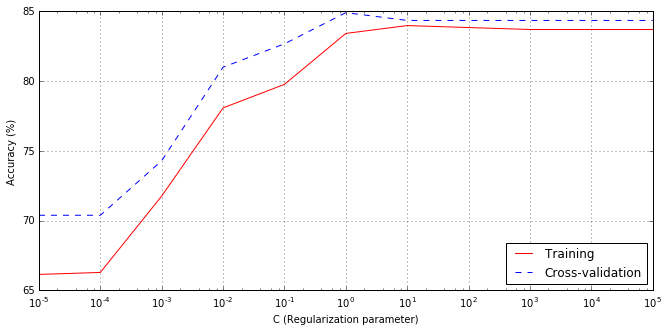

In [368]:
regular_coeff = [1e-5,1e-4,1e-3,1e-2,1e-1,1,1e1,1e2,1e3,1e4,1e5]
e_train = []
e_cv = []
for reg_param in regular_coeff:
    logistic_model = LogisticRegression(C=reg_param, tol=1e-8, max_iter=1000)
    logistic_model.fit(X_train,Y_train)
    logistic_model.predict(X_train)
    # check the accuracy of model on our traning dataset
    e_train.append(logistic_model.score(X_train,Y_train)*100)
    logistic_model.predict(X_cv)
    # check the accuracy of model on cv-dataset
    e_cv.append(logistic_model.score(X_cv,Y_cv)*100)

# Let's now plot the accuracy for different regularization parameter
figure = plt.figure(figsize=(11,5))
plt.semilogx(regular_coeff, e_train, 'r-', label="Training")
plt.semilogx(regular_coeff, e_cv, 'b--', label="Cross-validation")
plt.legend(loc='lower right')
plt.grid(True)
plt.xlabel('C (Regularization parameter)')
plt.ylabel('Accuracy (%)')
plt.title('')
plt.show()

It seems that best fitting value for C is between 1 and 10 where both accuracy of training and cross-validation dataset plateus. We choose the regularization parameter to be qual to 5. Note that smaller values of C indicate higher regularization.

We now output the result to file. This will be the submission file to kaggle.com

In [369]:
best_C = 5
logistic_model = LogisticRegression(C=best_C, tol=1e-8, max_iter=1000)
logistic_model.fit(X_train,Y_train)
print('Training accuracy (Logistic Model) %: Training dataset: ' + str(logistic_model.score(X_train,Y_train)*100))
print('Training accuracy (Logistic Model) %: CV dataset: ' + str(logistic_model.score(X_cv,Y_cv)*100))
output_csv_results(logistic_model, X_test, "resultLM.csv")

Training accuracy (Logistic Model) %: Training dataset: 83.5674157303
Training accuracy (Logistic Model) %: CV dataset: 84.9162011173
Results have been saved to resultLM.csv successfully.


### This gave us a score equal to 0.78469 on kaggle dashboard. 

This is a good score when compared to Random Forests (see below). Having enough and relevant features extracted from the dataset is contributing to this. 

## 3.2 Random Forest

Random forests have proved to be very powerful classification tool. They are based on decision trees, bagging and ensemble learning. For more information, visit: https://en.wikipedia.org/wiki/Random_forest

There are several parameters that can influence the performance of a random forest model. Here, we only consider fine-tunning two important arguments: 

-- 'n_estimators': The number of trees in the forest 

-- 'max_depth': The maximum depth of the tree. 

Let's start with max_depth: 

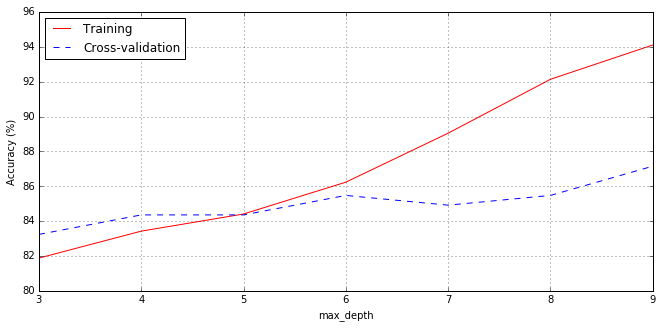

In [370]:
e_train = []
e_cv = []
max_depth_ = range(3,10)
for sn in max_depth_:
    rand_forest = RandomForestClassifier(max_features='sqrt', n_estimators=250, criterion='gini', max_depth=sn, oob_score=True)
    rand_forest.fit(X_train, Y_train)
    rand_forest.predict(X_train)
    e_train.append(rand_forest.score(X_train,Y_train)*100)
    rand_forest.predict(X_cv)
    e_cv.append(rand_forest.score(X_cv,Y_cv)*100)

figure = plt.figure(figsize=(11,5))
plt.plot(max_depth_, e_train, 'r-', label="Training")
plt.plot(max_depth_, e_cv, 'b--', label="Cross-validation")
plt.legend(loc='upper left')
plt.grid(True)
plt.xlabel('max_depth')
plt.ylabel('Accuracy (%)')
plt.title('')
plt.show()

It seems that max_depth =5 or 6 would be a good number. Of course we plotted this graph n_estimators=250. One can try different values, but the value of 5 or 6 seems to be the consistent range. 

Now, we investigate the influence of the number of trees via tunning n_estimators parameter. Here, we set max_depth = 6. 

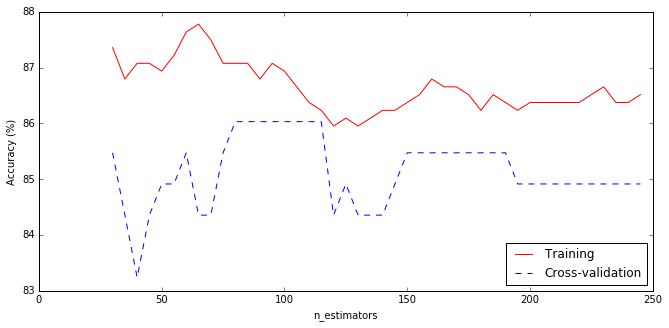

In [371]:
e_train = []
e_cv = []
n_estimators_ = range(30,250,5)
for ns in n_estimators_:
    rand_forest = RandomForestClassifier(max_features='sqrt',n_estimators=ns,max_depth=6,criterion='gini',random_state=100, oob_score=True)
    rand_forest.fit(X_train, Y_train)
    rand_forest.predict(X_train)
    e_train.append(rand_forest.score(X_train,Y_train)*100)
    rand_forest.predict(X_cv)
    e_cv.append(rand_forest.score(X_cv,Y_cv)*100)

figure = plt.figure(figsize=(11,5))
plt.plot(n_estimators_, e_train, 'r-', label="Training")
plt.plot(n_estimators_, e_cv, 'b--', label="Cross-validation")
plt.legend(loc='lower right')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy (%)')
plt.title('')
plt.show()

It seems that n_estimatar is not playing a crucial role. Any value larger than 70 is giving almost identical result based on cross-validation set. 
We choose n_estimator = 110. 

In [374]:
rand_forest = RandomForestClassifier(max_features='sqrt',n_estimators=110,max_depth=6,criterion='gini', random_state=100,oob_score=True)
rand_forest.fit(X_train, Y_train)
print('Training accuracy (Random forest)%: Training dataset: ' + str(rand_forest.score(X_train,Y_train)*100))
print('Training accuracy (Random forest)%: CV dataset: ' + str(rand_forest.score(X_cv,Y_cv)*100))
output_csv_results(rand_forest, X_test, "resultRF.csv")

Training accuracy (Random forest)%: Training dataset: 86.3764044944
Training accuracy (Random forest)%: CV dataset: 86.0335195531
Results have been saved to resultRF.csv successfully.


### This gave us a score of 0.79904 score on the competition scoreboard. 